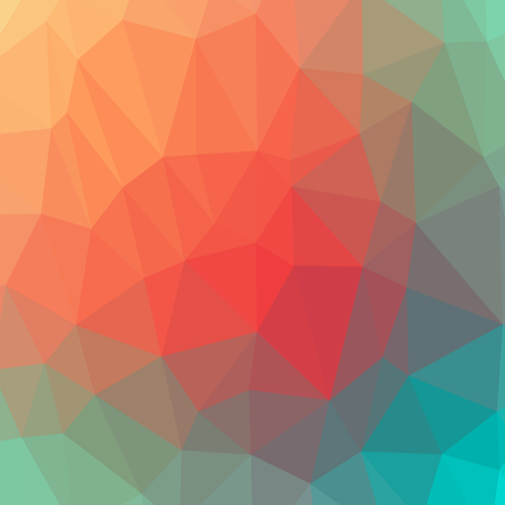

In [0]:
import cv2

from google.colab.patches import cv2_imshow

img = cv2.imread('/content/Hist1.jpg')

#cv2_imshow(img)

res_img = cv2.resize(img, (505, 505)) 

cv2_imshow(res_img)

In [0]:
from google.colab import drive
drive.mount('/gdrive')


Mounted at /gdrive


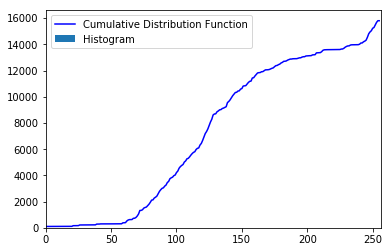

In [0]:
import numpy as np
from matplotlib import pyplot as plt

hist,bins = np.histogram(res_img.flatten(),256,[0,256]) 

cdf = hist.cumsum()

cdf_normalized = cdf*hist.max()/cdf.max()

plt.plot(cdf_normalized,color = 'b')
plt.hist(res_img.flatten(),256,[0,256],'r')
plt.xlim([0,256])
plt.legend(('Cumulative Distribution Function','Histogram'),loc='upper left')

plt.show()

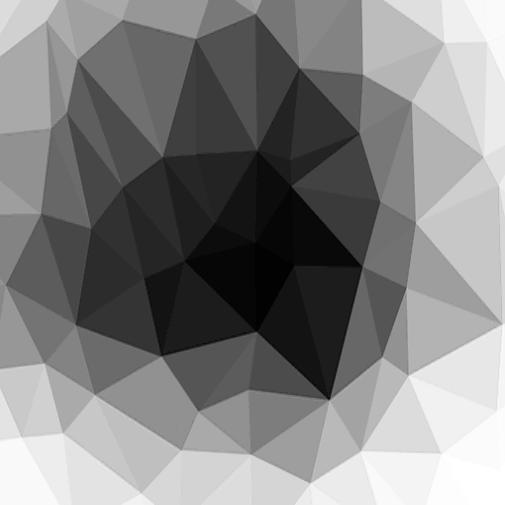

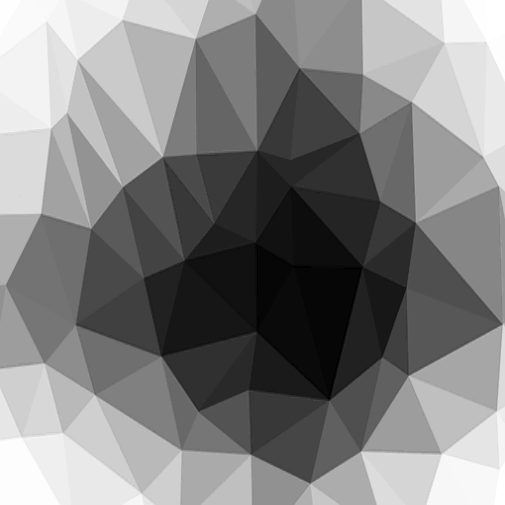

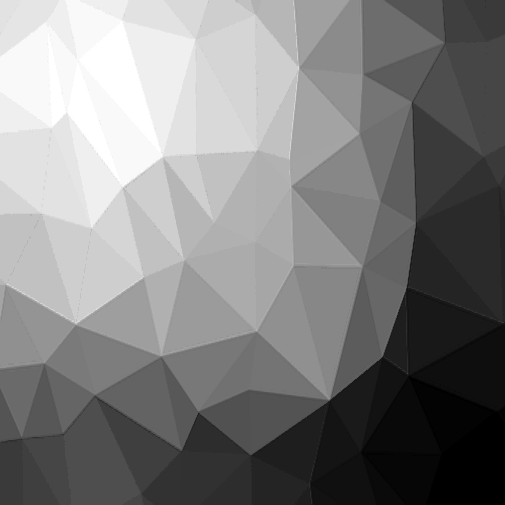

In [0]:
b,g,r = cv2.split(res_img)

equ_b = cv2.equalizeHist(b)
equ_g = cv2.equalizeHist(g)
equ_r = cv2.equalizeHist(r)

cv2_imshow(equ_b)
cv2_imshow(equ_g)
cv2_imshow(equ_r)

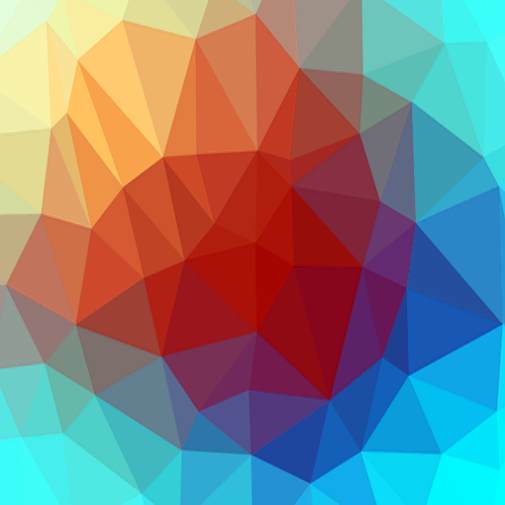

In [0]:
image_final = cv2.merge((equ_b,equ_g,equ_r))

cv2_imshow(image_final)

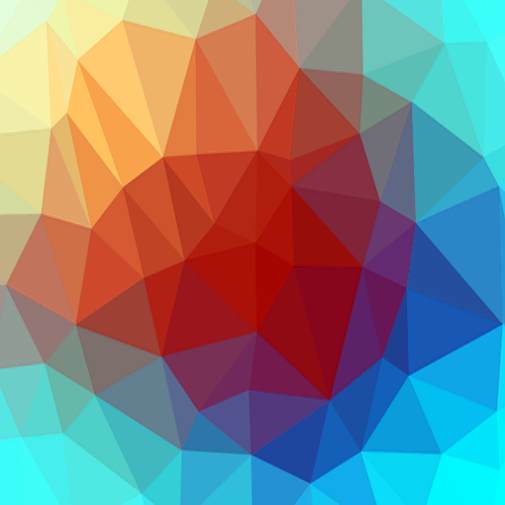

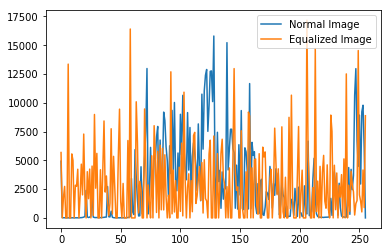

In [0]:
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage import color
from skimage import io

cv2_imshow(image_final)

img1 = color.rgb2gray((res_img))

img2 = color.rgb2gray((image_final))

hist1,bins1 = np.histogram(res_img.flatten(),256,[0,256]) 

hist2,bins2 = np.histogram(image_final.flatten(),256,[0,256]) 

Entropy1 = 0
Entropy2 = 0

s1 = hist1.cumsum()
s2 = hist2.cumsum()

plt.plot(bins1[:-1],hist1)
plt.plot(bins2[:-1],hist2)
plt.legend(['Normal Image','Equalized Image'])
plt.show()

In [0]:
import math as m

Entropy1 = 0
Entropy2 = 0 

for i in range(0,255):
  
  p1 = hist1[i]/s1[-1]
  
  Entropy1 += -p1*m.log(p1)

for i in range(0,255):
  
  p2 = hist2[i]/s2[-1]
  
  if p2!=0:
    Entropy2 += -p2*m.log(p2)
    
print(Entropy1,Entropy2)

4.882988919991669 4.8442684101411775
